# Modelo FitzHugh-Nagumo: O oscilador de Van der Pol em disparos neurais

- PET - Física
- Petianos: Paulo Henrique Cunha Pacheco e Ylana Karolina Santos Lopes 
- Data: 10/01/2025

$\quad$O presente ```Notebook``` tem como objetivo principal introduzir a aplicação de sistemas dinâmicos a neurociência por meio do estudo de modelo de disparos neurais

Este ```Notebook``` está organizado da seguinte forma:

- *Sistemas Dinâmicos e Neurociência*
- *O Oscilador de Van der Pol*
- *O Modelo FitzHugh-Nagumo*
- *Conclusão*

## Pré-requisitos

Não sei se tem ainda

## Importando as bibliotecas

In [3]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

## Detalhes das Bibliotecas

In [2]:
%load_ext version_information
%version_information matplotlib, numpy, scipy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
matplotlib 3.8.0
numpy 1.26.4
scipy 1.12.0
Wed Jan 08 18:18:17 2025 Hora oficial do Brasil

## 1. Sistemas Dinâmicos e Neurociência 

### 1.1 Uma breve introdução à Sistemas Dinâmicos
    
$\quad$ Para começar, precisamos entender alguns conceitos que serão importantes daqui pra frente, principalmente no que diz respeito ao estudo dos sistemas dinâmicos e suas aplicações para modelar o funcionamento de neurônios. 

$\quad$Um sistema dinâmico consiste em um conjunto de variáveis que descrevem seu estado atual e uma ou mais equações diferenciais não-lineares que descrevem a evolução temporal dessas variáveis de estado. Por esse motivo, um sistema dinâmico descreve como um estado em um dado momento depende dos estados em momentos anteriores. Para esse estudo, interpretar um conjunto de equações diferenciais não é tão eficiente para compreender um determinado sistema, em razão disto, utiliza-se o **retrato de fase** de um sistema dinâmico para compreender melhor como ele funciona. Um retrato de fase é, em suma, uma descrição do que acontece com os valores da variáveis de estado com o passar do tempo, e com isso conseguimos fazer uma análise qualitativa da dinâmica do sistema sem se quer ser necessário que saibamos todos os detalhes que governam a natureza do mesmo. Em um retrato de fase é mostrado certos elementos importantes para determinar a natureza da trajetória de qualquer uma dessas variáveis, como principais para o estudo de sistemas dinâmicos temos: 

- *Os pontos de equilíbrio*: Pontos no retrato de fase para o qual todas as trajetórias são direcionadas (pontos de equilíbrio estável) ou da qual todas as trajetórias se afastam (pontos de equilíbrio instável);
- *Ciclos limite*: Trajetórias na qual as variáveis podem se manter ciclicamente ao longo do tempo; 
- *Bifurcações*: Transições entre dinâmicas diferentes em um mesmo sistema.

Esses são alguns conceitos importantes para a compreensão de retratos de fase de qualquer sistema dinâmico.

### 1.2 Neurociência: dinâmica de neurônios

$\quad$Em 1952, Alan Lloyd Hodgkin e Andrew Huxley descreveram um modelo matemático para a descrição da propagação e inativação dos potenciais de ação de um neurônio. O modelo foi chamado de Modelo Hodgkin-Huxley e é formado por um sistema de quatro equações diferenciais que se conectam por meio da condutância de canais de Sódio, Potássio, etc, que são canais dependentes de voltagem. Normalmente, as principais variáveis que descrevem a dinâmica neuronal podem ser classificadas em três classes, de acordo com sua função e escala de tempo: 

- Potencial de membrana.
- Variáveis de excitação, como ativação de uma corrente de Sódio.
- Variáveis de recuperação, como inativação de corrente de Na+ e ativação de corrente rápida
Corrente K+.

$\quad$Todas essas variáveis em um neurônio (além de outras) seguindo as leis de variação temporal das equações diferenciais de uma ou mais formas resultam em dinâmicas também distintas, por exemplo: Podemos ter um neurônio que não dispare uma sinapse para uma determinada intensidade de corrente e o seu potencial de membrana se mantém num certo valor constante, contudo, se estimular o neurônio o suficiente com uma intensidade de corrente maior que um determinado limiar, o potencial de membrana sobe drásticamente e este neurônio dispara, podendo até disparar repetidamente. Se estudarmos o retrato de fase desse tipo de dinâmica, este seria um gráfico da variável de excitação versus Potencial de membrana, e poderíamos dizer que, para um estímulo pouco energético, o sistema tendeu ao equilíbrio (ponto de equilíbrio estável), contúdo, para um estímulo mais energético, o sistema ganha uma trajetória mais alongada (valores maiores do potencial de membrana) que descreve o disparo do neurônio. Se, no caso do neurônio disparar repetidamente, podemos dizer que houve uma bifurcação no sistema e a trajetória de um único disparo se tornou um ciclo limite (disparos seguidos).

## 2. O Oscilador de Van der Pol

$\quad$O oscilador van der Pol (1926), denominado como um oscilador de relaxamento, possui a característica de ser estável porém dissipativo. Este oscilador, frequentemente empregado para a investigação das propriedades de osciladores não lineares, se torna muito útil quando desejamos modelar fenômenos oscilatórios, que no nosso caso, será o disparo de neurônios. A Equação do oscilador de Van der Pol é: 

$$
\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = 0
$$

onde $\mu$ mede a força do termo de amortecimento e $x(t)$ é a posição do oscilador.

### 2.1 Implementando o oscilador de Van der Pol

$\quad$Ao implementarmos o oscilador de Van der Pol, primeiro definiremos a função em python e, definindo os parâmetros "mu"($\mu$), posição e velocidade inicial, calcularemos a função e criaremos um gráfico de cada resultado. O gráfico final será o retrato de fase do oscilador de Van der Pol, que pode ser interpretado como um **ciclo limite amortecido**.

In [4]:
#  função van der pol
def van_der_pol(t, z, mu):
    x, dxdt = z  
    dzdt = [dxdt, mu * (1 - x**2) * dxdt - x]
    return dzdt


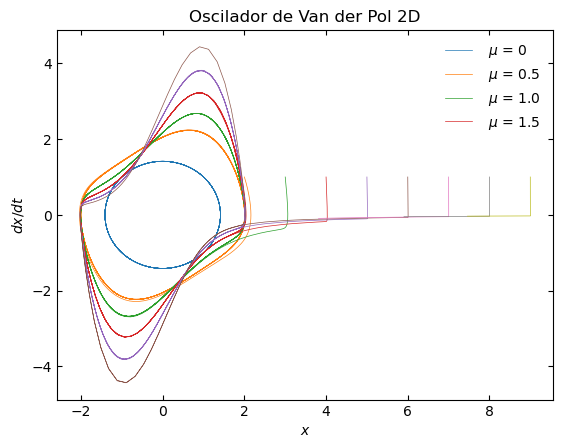

In [81]:
# parametros
mu = 0 ## estabilizando o mu vê melhor a forma do sistema 'how sharp'

z0 = [1.0, 1.0]  # posição e velocidade inicial

t = np.linspace(0, 50, 1000)

while z0[0] < 10:
    sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
    x = sol.y[0] #posição
    y = sol.y[1] #velocidade
    plt.plot(x, y, linewidth=0.5, label = f" $\mu$ = {mu}")
    if mu in [0, 1.5]:
        plt.legend(frameon = False)
    mu += 0.5
    z0[0] += 1


plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Oscilador de Van der Pol 2D')
plt.xlabel(f'$x$')
plt.ylabel(f'$dx/dt$')
plt.show()


$\quad$Agora, o código se torna mais simples, pois desejamos criar um gráfico apenas da posição do oscilador ao longo do tempo, e com o gráfico final, observa-se um comportamento distinto de um oscilador normal devido ao termo dissipativo "mu" ($\mu$). Se o leitor(a) desejar, pode alterar o valor de "mu" em ambos os códigos e verificar ligeiras variações no formato do retrato de fase ou do gráfico de posições do oscilador.

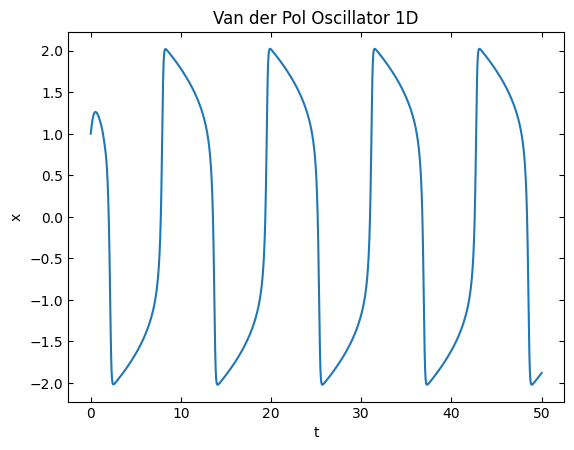

In [5]:
mu = 5

z0 = [1.0, 1.0]
sol = solve_ivp(van_der_pol, [0, 50], z0, args=(mu,), t_eval=t)
x = sol.y[0]
y = sol.y[1]

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Van der Pol Oscillator 1D')
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, label='Posição (x)')


## 3. O Modelo FitzHugh-Nagumo

$\quad$O modelo de FitzHugh-Nagumo é uma simplificação do modelo de Hodgkin-Huxley, utilizado para descrever a dinâmica de neurônios e outros sistemas biológicos que exibem comportamentos de excitação, como os impulsos nervosos. Ele foi desenvolvido por Richard FitzHugh (1961) e, posteriormente, por J. Nagumo e colaboradores (1962), para capturar as características essenciais da excitação e repolarização neuronal de forma mais simples, sem a alta complexidade do modelo de Hodgkin-Huxley. Este modelo é formado por duas equações diferenciais: 

$$ \frac{dV(t)}{dt}=V(a-V)(V-1) - w + I $$

$$ \frac{dw(t)}{dt}=bV - cw $$

onde $V$ é o potencial de membrana do neurônio, $w$ é a variável de recuperação (relativa à inativação dos canais iônicos no neurônio), $I$ é a corrente inicial injetada no sistema (ou estímulo externo de outro neurônio) e os parâmetros a, b e c controlam a dinâmica da sistema (como forma da curva no retrato de fase e mudanças da variável $w$). Vamos tentar implementá-lo e observar o gráfico das duas equações do modelo.

### 3.1 Implementando o modelo FitzHugh-Nagumo em python


$\quad$Inicialmente podemos definir a função ``fitzhugh_nagumo`` que implementa o modelo tratado na seção anterior, como também os parâmetros arbitrários para 

In [83]:
# Parâmetros do modelo de FitzHugh-Nagumo
epsilon = .08 # 
a = 0.0 # Parâmetro de excitação
b = 0.0 # Parâmetro de recuperação

# Implementar o modelo de FitzHugh-Nagumo
def fitzhugh_nagumo(X, t):
    V, W = X
    dVdt = V - (V**3) / 3 - W + I
    dWdt = epsilon * (V + a - b * W)
    return [dVdt, dWdt]


$\quad$Como é possível observar, o modelo mostra um caráter oscilatório nas variáveis que compõem o modelo, gerando um gráfico muito parecido com o gráfico da posição do oscilador de Van der Pol. Se criarmos um gráfico da variável de recuperação com o potencial de membrana, teremos, ao final, o retrato de fase do modelo de FitzHugh-Nagumo.

$\quad$Nota-se que existe tanto o aumento do potencial de membrana (chamada fase de excitação) quanto a diminuição deste (chamada fase de repolarização). Além disso, a depender dos parâmetros, como no caso, o sistema exibe ciclos de excitação e recuperação, descrevendo um caráter oscilatório esperado para a dinâmica, que foi observada no gráfico das variáveis do modelo ao longo do tempo. 


In [89]:
# Condições Iniciais
V0 = 1.0
W0 = 1.0
X0 = [V0, W0]

# Pontos de tempo para integração
t = np.linspace(0, 100, 10000)  

I = 0.5

sol = odeint(fitzhugh_nagumo, X0, t)

# Extrair as soluções para V e W
V = sol[:, 0]
W = sol[:, 1]


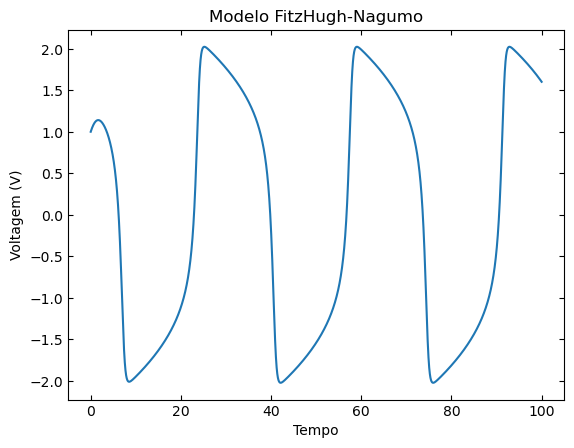

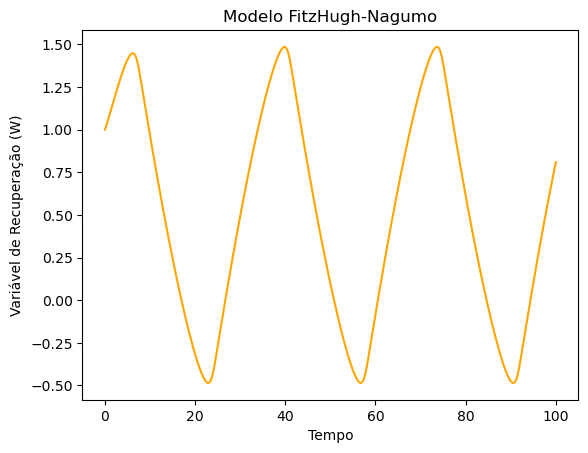

In [90]:
plt.plot(t, V, label='V (Voltage)')
plt.title('Modelo FitzHugh-Nagumo')
plt.xlabel('Tempo')
plt.ylabel('Voltagem (V)')
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.show()


plt.plot(t, W, c = 'orange', label=' W (Variável de Recuperação)')
plt.title('Modelo FitzHugh-Nagumo')
plt.xlabel('Tempo')
plt.ylabel('Variável de Recuperação (W)')
plt.show()

Text(0, 0.5, 'Variável de recuperação, W')

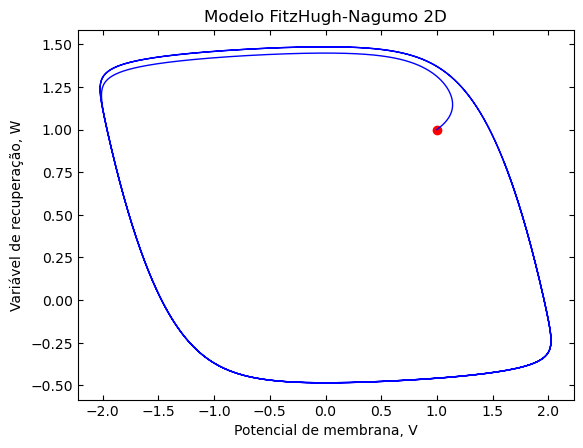

In [75]:
plt.scatter(W[0],V[0], color='r', label='Initial State')

plt.plot(V, W, label='Retrato de fase', color='b', linewidth = 1)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.title('Modelo FitzHugh-Nagumo 2D')
plt.xlabel('Potencial de membrana, V')
plt.ylabel('Variável de recuperação, W')

## Conclusão

$\quad$Com o trabalho desenvolvido aqui em relação ao estudo e à implementação em python do oscilador de Van der Pol e do modelo neuronal de FitzHugh-Nagumo, pode-se perceber certas semelhanças entre ambos os modelos de sistemas dinâmicos:

- A equação do oscilador de Van der Pol mostra um termo não linear de amortecimento​ $\mu (1-x^2)\frac{dx}{dt} $, que pode ser comparado ao comportamento da variável de recuperação w no modelo de FitzHugh-Nagumo.
- Podemos perceber, como já foi mencionado, que ambos os modelos possuem características oscilatórias semelhantes, nos permitindo relacionar o termo não-linear V do modelo de FitzHugh-Nagumo ao termo não-linear no oscilador de Van der Pol, que envolve uma função do tipo $x^2$.
- O temro $\mu$ no oscilador de Van der Pol controla a intensidade do amortecimento causa a não-linearidade das oscilações. Analogamente, os parâmetros a,b e c do modelo de FitzHugh-Nagumo controlam a velocidade da dinâmica de recuperação e a relação entre a excitação e a recuperação.  

$\quad$Com isso, conclui-se que o modelo de FitzHugh-Nagumo é uma adaptação e generalização do Oscilador de Van der Pol aplicada à disparos neurais.

## Referências

[1] STROGATZ, Steven H. Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering. CRC press, 2018.

[2] IZHIKEVICH, Eugene M. Dynamical systems in neuroscience. MIT press, 2007.

[3] KINOSHITA, Shuichi (Ed.). Pattern Formations and Oscillatory Phenomena. Newnes, 2013.

[4] FITZHUGH, Richard. Impulses and physiological states in theoretical models of nerve membrane. Biophysical journal, v. 1, n. 6, p. 445-466, 1961.

[5] Nagumo, J., Arimoto, S. and Yoshizawa, S. (1962) An Active Pulse Transmission Line Simulating Nerve Axon. Proceedings of the IRE, 50, 2061-2070.

[6] Balth. van der Pol Jun. D.Sc (1926) LXXXVIII. On
“relaxation-oscillations” , Philosophical Magazine Series 7, 2:11, 978-992